<a href="https://colab.research.google.com/github/Talos6/AIPI590-Embedding/blob/main/aipi590_embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AIPI 590 - XAI | Assignment #08
### Description
Visualizing the embedding space of all MiniLM L12 v2 model using PCA, t-SNE and UMAP
### Your Name
Xinyue(Yancey) Yang

[![Open In Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Talos6/AIPI590-Embedding/blob/main/aipi590-embedding.ipynb)

In [ ]:
# Install dependencies
!pip install umap-learn==0.5.6

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sentence_transformers import SentenceTransformer
from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

We will use a subset of the 20 Newsgroups dataset, focusing on a few categories for clarity.

In [ ]:
# Prepare sample data
categories = ['talk.politics.guns', 'rec.autos', 'sci.electronics']

# Load data
newsgroups = fetch_20newsgroups(subset='train', categories=categories)

# Create a DataFrame
df = pd.DataFrame({'text': newsgroups.data, 'target': newsgroups.target})
df['target_names'] = df['target'].apply(lambda x: newsgroups.target_names[x])
df.head()

,text,target,target_names
0,From: lzahas@acs2.bu.edu (Lukas Zahas)\nSubjec...,1,sci.electronics
1,From: chuck@eng.umd.edu (Chuck Harris - WA3UQV...,2,talk.politics.guns
2,From: cracker@tc.fluke.COM (Don Graham)\nSubje...,0,rec.autos
3,From: kimata@convex.com (Hiroki Kimata)\nSubje...,0,rec.autos
4,From: moselecw@elec.canterbury.ac.nz (moz [chr...,1,sci.electronics


In [ ]:
# Load the all MiniLM L12 v2 model
model = SentenceTransformer('sentence-transformers/all-MiniLM-L12-v2')

# Compute embeddings
embeddings = model.encode(df['text'], show_progress_bar=True)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/133M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/352 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/55 [00:00<?, ?it/s]

## PCA
PCA plot shown below, we can clearly see that the categories are overlapping.

**Pros**:
*   Very fast and computationally efficient.
*   Global variance maintained.

**Cons**:
*   It does not capture complex structure due to it is a linear model.
*   Not able to separate clusters due to the data are not linearly separable.


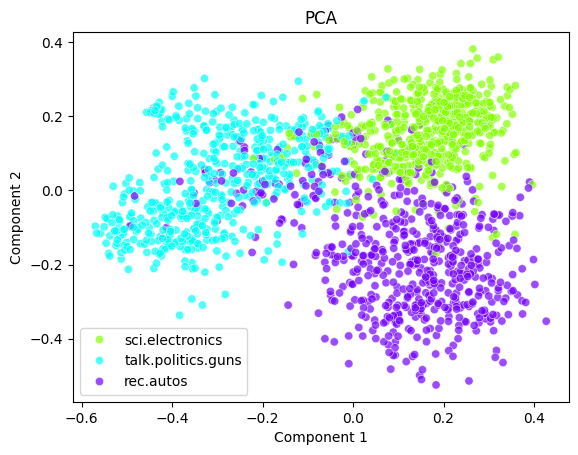

In [ ]:
# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(embeddings)
df['pca-one'] = pca_result[:, 0]
df['pca-two'] = pca_result[:, 1]

# Visualize
sns.scatterplot(
    x='pca-one', y='pca-two',
    hue='target_names',
    palette=sns.color_palette('hsv', len(categories)),
    data=df,
    legend='full',
    alpha=0.7
)
plt.title('PCA')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(loc='best')
plt.show()

## t-SNE
t-SNE with perplexity = 30 plot shown below,there is less overlapping between clusters compared to PCA but it didn't preserve the global structure.

**Pros**:
*   Capture local neighbor relationships.
*   Less overlapping, similar neighbours are assigned to the same cluster.

**Cons**:
*   It does not show global representation unless through hyperparameter tunning of perplexity.
*   Results can vary according to different random_state initialization.

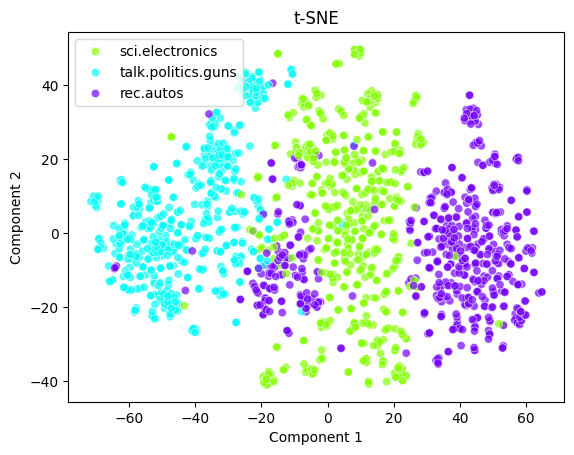

In [ ]:
# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42, max_iter=1000)
tsne_results = tsne.fit_transform(embeddings)
df['tsne-one'] = tsne_results[:, 0]
df['tsne-two'] = tsne_results[:, 1]

# Visualize
sns.scatterplot(
    x='tsne-one', y='tsne-two',
    hue='target_names',
    palette=sns.color_palette('hsv', len(categories)),
    data=df,
    legend='full',
    alpha=0.7
)
plt.title('t-SNE')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(loc='best')
plt.show()


## UMAP
UMAP plot shown below,there is less overlapping between clusters compared to PCA and it shows the global structure of data compared to t-SNE.

**Pros**:
*   Balances local and global structure preservation.
*   Structure is stable even with randomized initialization.

**Cons**:
*   It runs slower compared to PCA.
*   Needs hyperparameter tunning to have a better interpretation.

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



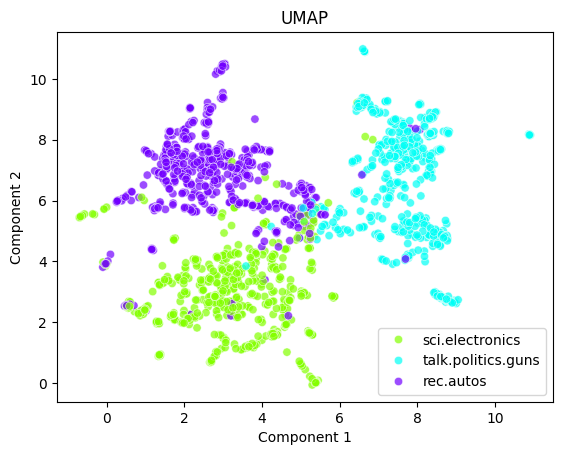

In [ ]:
# Apply UMAP
umap_reducer = umap.UMAP(n_components=2, random_state=42)
umap_results = umap_reducer.fit_transform(embeddings)
df['umap-one'] = umap_results[:, 0]
df['umap-two'] = umap_results[:, 1]

# Visualize
sns.scatterplot(
    x='umap-one', y='umap-two',
    hue='target_names',
    palette=sns.color_palette('hsv', len(categories)),
    data=df,
    legend='full',
    alpha=0.7
)
plt.title('UMAP')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(loc='best')
plt.show()

## Summary

**PCA** is fast and capture the global structure. But it failed to separate the classes due to its linear nature. It can be used as the initial explorations.

**t-SNE** reveals the local neighbor relationships. But it failed to preserve the global structure and suffer from random initialization. It can be used to focus on neighbor relationship.

**UMAP** balances the separation and global structure. It needs hyperparameter tunning to show a stable and interpretable structure. It is the most effective one considering we need to view embedding space in both local and global structure.